# $\color{blue}{\text{Tasks:}}$

$\color{green}{\text{1. Data Cleaning }}$

$\color{green}{\text{2. Segregate Paid and Free Apps}}$

$\color{green}{\text{3. Segregate Cheap and Reasonable Apps}}$

$\color{green}{\text{4. Extract Undervalued Apps}}$

$\color{green}{\text{5. Suggest Apps in which price needs to be increased}}$

# $\color{darkblue}{\text{1. Data Cleaning}}$

In [1]:
import pandas as pd    # import pandas library

In [2]:
google = pd.read_csv("google.csv")    # load csv file in computer memory and asign it into a variable

In [3]:
google.head()    # use head function for a casual look at the data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google.shape    # shape to check the no. of rows and columns

(10841, 13)

In [5]:
google.info()    # see the summary including data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
google.isnull().sum()    # see the null values in the data

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
google.fillna("NaN", inplace = True)    # fill missing values with NaN and update data

In [8]:
google.isnull().sum()    # all missing values converted to NaN

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
google.Type.unique()   # check the unique values in column "Type"

array(['Free', 'Paid', 'NaN', '0'], dtype=object)

In [10]:
(google.Type == "0").sum()    # check how many rows are their with Type "0"

1

In [11]:
google[google.Type == "0"] # extract that one row to see the error

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
google.loc[[10472,10473]]    # see other lines data to match with the wrong one

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [13]:
(google.Type == "NaN").sum()    ## check how many rows are their with Type "NaN"

1

In [14]:
google[google.Type == "NaN"]   # extract that one row to see the error

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


# $\color{darkblue}{\text{2. Segregate Paid and Free Apps}}$

In [15]:
google.Type.unique()   # unique values in column "Type"

array(['Free', 'Paid', 'NaN', '0'], dtype=object)

$\color{green}{\text{We are currently just working on paid apps to fulfill the provided tasks.}}$

In [16]:
paid_apps = google[google.Type == "Paid"].copy()    # extract paid apps from the data and store into a variable

In [17]:
paid_apps.head()    # glimpse of the data stored in paid_apps variable

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [18]:
paid_apps.info()    # summary of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             800 non-null    object
 1   Category        800 non-null    object
 2   Rating          800 non-null    object
 3   Reviews         800 non-null    object
 4   Size            800 non-null    object
 5   Installs        800 non-null    object
 6   Type            800 non-null    object
 7   Price           800 non-null    object
 8   Content Rating  800 non-null    object
 9   Genres          800 non-null    object
 10  Last Updated    800 non-null    object
 11  Current Ver     800 non-null    object
 12  Android Ver     800 non-null    object
dtypes: object(13)
memory usage: 87.5+ KB


In [19]:
paid_apps.reset_index(drop = True, inplace = True)    # reset index

In [20]:
paid_apps.info()    # revised summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             800 non-null    object
 1   Category        800 non-null    object
 2   Rating          800 non-null    object
 3   Reviews         800 non-null    object
 4   Size            800 non-null    object
 5   Installs        800 non-null    object
 6   Type            800 non-null    object
 7   Price           800 non-null    object
 8   Content Rating  800 non-null    object
 9   Genres          800 non-null    object
 10  Last Updated    800 non-null    object
 11  Current Ver     800 non-null    object
 12  Android Ver     800 non-null    object
dtypes: object(13)
memory usage: 81.4+ KB


In [21]:
paid_apps.Price.unique()    # check the unique values in price column

array(['$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
paid_apps.Type.unique()   # check the unique values in type column

array(['Paid'], dtype=object)

In [23]:
paid_apps["Price"] = paid_apps["Price"].str.strip("$").astype(float)  # remove $ sign from the data

In [24]:
paid_apps.Price    # $ sign removed

0       4.99
1       4.99
2       4.99
3       4.99
4       3.99
       ...  
795     0.99
796     7.99
797    16.99
798     1.20
799     1.04
Name: Price, Length: 800, dtype: float64

In [25]:
import matplotlib.pyplot as plt   # import library to visualize Price data on graph

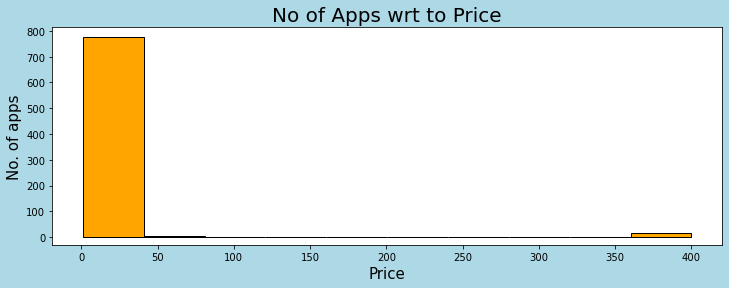

In [26]:
fig,ax = plt.subplots(figsize = (12,4), facecolor = "lightblue")
paid_apps["Price"].hist(ax = ax, color="orange", ec = "black")
ax.grid(False)
plt.xlabel("Price", fontsize=15, color = "black")
plt.ylabel("No. of apps", fontsize=15, color = "black")
plt.title("No of Apps wrt to Price", fontsize=20, color = "black")
plt.xticks(fontsize=10, color = "black")
plt.yticks(fontsize=10, color = "black")
plt.ylim(-30)
plt.show()

$\color{red}{\text{Remove Outliers}}$

In [27]:
paid = paid_apps[paid_apps["Price"]< 50].copy()  # outliers removed

In [28]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 799
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             776 non-null    object 
 1   Category        776 non-null    object 
 2   Rating          776 non-null    object 
 3   Reviews         776 non-null    object 
 4   Size            776 non-null    object 
 5   Installs        776 non-null    object 
 6   Type            776 non-null    object 
 7   Price           776 non-null    float64
 8   Content Rating  776 non-null    object 
 9   Genres          776 non-null    object 
 10  Last Updated    776 non-null    object 
 11  Current Ver     776 non-null    object 
 12  Android Ver     776 non-null    object 
dtypes: float64(1), object(12)
memory usage: 84.9+ KB


In [29]:
paid.reset_index(drop = True, inplace = True)    # reset index

In [30]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             776 non-null    object 
 1   Category        776 non-null    object 
 2   Rating          776 non-null    object 
 3   Reviews         776 non-null    object 
 4   Size            776 non-null    object 
 5   Installs        776 non-null    object 
 6   Type            776 non-null    object 
 7   Price           776 non-null    float64
 8   Content Rating  776 non-null    object 
 9   Genres          776 non-null    object 
 10  Last Updated    776 non-null    object 
 11  Current Ver     776 non-null    object 
 12  Android Ver     776 non-null    object 
dtypes: float64(1), object(12)
memory usage: 78.9+ KB


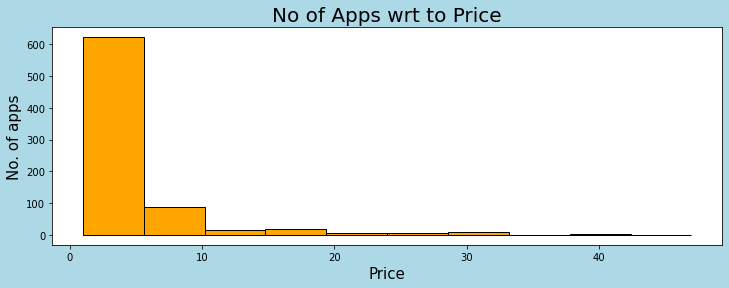

In [31]:
fig,ax = plt.subplots(figsize = (12,4), facecolor = "lightblue")
paid["Price"].hist(ax = ax, color="orange", ec = "black")
ax.grid(False)
plt.xlabel("Price", fontsize=15, color = "black")
plt.ylabel("No. of apps", fontsize=15, color = "black")
plt.title("No of Apps wrt to Price", fontsize=20, color = "black")
plt.xticks(fontsize=10, color = "black")
plt.yticks(fontsize=10, color = "black")
plt.ylim(-30)
plt.show()

In [32]:
paid.Price.value_counts(bins = 10)

(0.943, 5.59]     621
(5.59, 10.19]      90
(14.79, 19.39]     19
(10.19, 14.79]     15
(28.59, 33.19]      9
(19.39, 23.99]      8
(23.99, 28.59]      8
(37.79, 42.39]      3
(33.19, 37.79]      2
(42.39, 46.99]      1
Name: Price, dtype: int64

$\color{darkblue}{\text{3. Segregate Cheap and Reasonable Apps}}$

In [33]:
paid.columns   # to show all columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [34]:
paid = paid[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Price']]  # drop irrelevant columns

In [35]:
paid["Price_Category"] = 0   # add new column in the existing data

In [36]:
paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Price_Category
0,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,0
1,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,0
2,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,0
3,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,0
4,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,0
...,...,...,...,...,...,...,...,...,...
771,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,0.99,0
772,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,7.99,0
773,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,0
774,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,1.20,0


In [37]:
def Price_Category(price):    # function to assign values 
    if price < 5:
        return "Cheap"
    else:
        return "Reasonable"

In [38]:
paid["Price_Category"] = paid.Price.apply(Price_Category)   # apply function to the original data

In [39]:
paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Price_Category
0,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Cheap
1,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Cheap
2,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Cheap
3,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Cheap
4,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Cheap
...,...,...,...,...,...,...,...,...,...
771,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,0.99,Cheap
772,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,7.99,Reasonable
773,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,Reasonable
774,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,1.20,Cheap


In [40]:
paid.Price_Category.value_counts()   # check counts of each Price_Category

Cheap         614
Reasonable    162
Name: Price_Category, dtype: int64

$\color{darkblue}{\text{4. Extract Undervalued Apps}}$

In [41]:
mean_values = paid.groupby("Price_Category")["Price"].mean()  # check mean value

In [42]:
mean_values # mean values of Price_Category

Price_Category
Cheap          2.599593
Reasonable    12.874938
Name: Price, dtype: float64

In [43]:
paid["Suggestion"] = 0   # create new column as Suggestion

In [44]:
paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Price_Category,Suggestion
0,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Cheap,0
1,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Cheap,0
2,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Cheap,0
3,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Cheap,0
4,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Cheap,0
...,...,...,...,...,...,...,...,...,...,...
771,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,0.99,Cheap,0
772,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,7.99,Reasonable,0
773,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,Reasonable,0
774,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,1.20,Cheap,0


In [45]:
def Suggestion(x):           # function to check whether price needs to be increase or not
    y = x['Price_Category']
    z = x["Price"]
    if y == "Cheap":
        if z < mean_values[0]:
            return "Increase"
        else: 
            return "No Impact"
    elif y == "Reasonable":
        if z < mean_values[1]:
            return "Increase"
        else:
            return "No Impact"

In [46]:
paid["Suggestion"] = paid.apply(Suggestion, axis = 1) # apply function

In [47]:
paid.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Price_Category,Suggestion
0,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Cheap,No Impact
1,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Cheap,No Impact
2,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Cheap,No Impact
3,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Cheap,No Impact
4,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Cheap,No Impact
5,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Cheap,No Impact
6,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Reasonable,Increase
7,Truth or Dare Pro,DATING,NaN,0,20M,50+,Paid,1.49,Cheap,Increase
8,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18k,100+,Paid,2.99,Cheap,No Impact
9,Ad Blocker for SayHi,DATING,NaN,4,1.2M,100+,Paid,3.99,Cheap,No Impact


$\color{darkblue}{\text{5. Suggest Apps in which price needs to be increased}}$

In [59]:
paid.Suggestion.value_counts()  # check how many apps are thier to increase price

Increase     419
No Impact    357
Name: Suggestion, dtype: int64

$\color{green}{\text{We need to increase the price of 419 Apps}}$

In [60]:
final_data = paid[paid["Suggestion"] == "Increase"]  # store data into final_data variable

In [63]:
final_data["Suggestion"].value_counts() # check

Increase    419
Name: Suggestion, dtype: int64

In [64]:
final_data.to_csv("final_data.csv", index = False)  # Export final_data to csv file

# $\color{darkblue}{\text{Conclusion:}}$


$\color{green}{\text{1. There are 419 apps whose price needs to be increased}}$

$\color{green}{\text{2. For Cheap price should not be more than its mean value i.e. 2.59}}$

$\color{green}{\text{3. For Reasonable price should not be more than its mean value i.e. 12.87}}$